In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
start_date = pd.to_datetime('2016-08-01 00:00:00')
end_date = pd.to_datetime('2017-04-30 23:00:00')

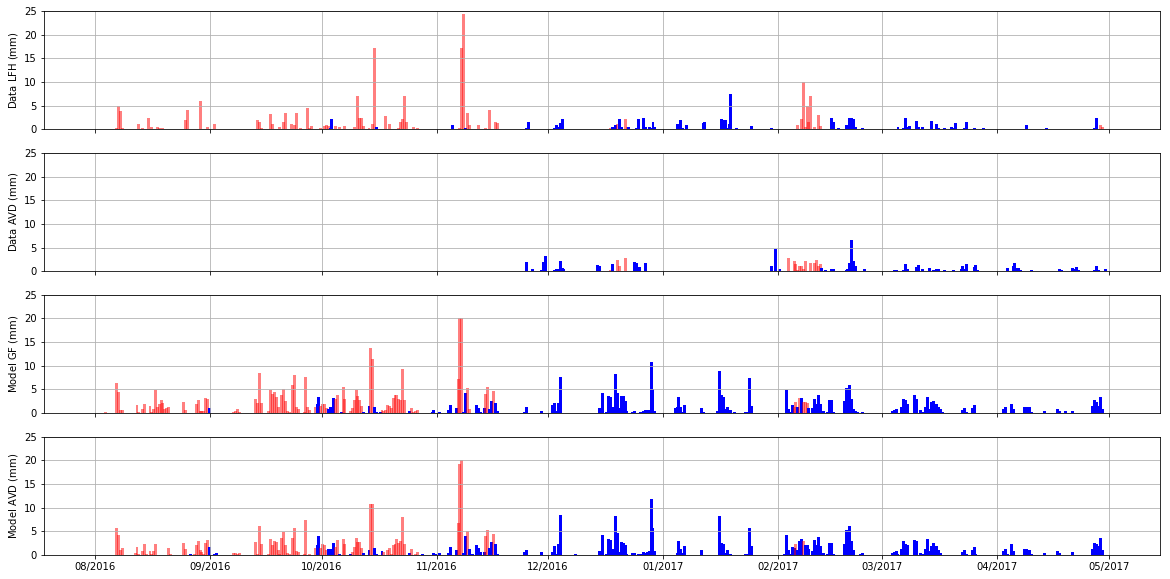

In [8]:
file_name = "precip_all"

fig, ax = plt.subplots(4,1, sharex=True, figsize=(20, 10))

for i, prefix in enumerate(["LFH", "AVD"]):
    RR_path = prefix + "_RR_ts.txt"
    T_path = prefix + "_T_ts.txt"
    r_df = pd.read_csv(RR_path,header=0, index_col=0, parse_dates=True, na_values="NaN")
    r_df = r_df[start_date:end_date]

    t_df= pd.read_csv(T_path,header=0, index_col=0, parse_dates=True, na_values="NaN")
    t_df = t_df[start_date:end_date]
    t_resampled = t_df.resample(rule="12H", loffset=pd.Timedelta("6H")).mean()
    for timestamp in t_resampled.index:
        rain = r_df["RR"][timestamp]
        temp = t_resampled["T"][timestamp]

        color = [1.0,0.0,0.0,0.5] if temp > 0.5 else "blue"
        ax[i].bar(timestamp, rain, color=color)
        
    ax[i].grid()
    ax[i].set_ylabel("Data " + prefix + " ($\\mathrm{mm}$)")
    
    ax[i].set_ylim(0,25)
    
for i, prefix in enumerate(["GF", "AVD"]):

    ERA5_all = pd.read_csv('ERA5_'+prefix+'.txt', index_col = 0, parse_dates = True, 
                           na_values = 'NaN', header = 0, 
                           names = ['TIMESTAMP', 'HS', 'RR', 'RRmm', 'T2m', 'ptype'])

    ERA5_all = ERA5_all[start_date:end_date]

    r_resampled = ERA5_all[6:].resample(rule="12H", base=6, loffset=pd.Timedelta("6H"))["RRmm"].sum()
    t_resampled = ERA5_all[6:].resample(rule="12H", base=6, loffset=pd.Timedelta("6H"))["T2m"].mean()

    for timestamp in t_resampled.index:
        rain = r_resampled[timestamp]
        temp = t_resampled[timestamp] - 273.15 #convert K degrees to C

        color = [1.0,0.0,0.0,0.5] if temp > 0.5 else "blue"
        ax[i+2].bar(timestamp, rain, color=color)
        
    ax[i+2].grid()
    ax[i+2].set_ylabel("Model " + prefix + " ($\\mathrm{mm}$)")
    
    ax[i+2].set_ylim(0,25)

    
tickdates = pd.date_range(start_date, t_resampled.index[-1]+72, freq="M")
xticks = ['%02d/%d' %(date.month, date.year) for date in tickdates]
ax[3].set_xticklabels(xticks)
plt.show()
fig.savefig("plots/%s.eps" % file_name)
fig.savefig("plots/%s.png" % file_name, dpi=200)